In [35]:
import sys
import os
import numpy as np
import warnings
import yaml
from datetime import datetime
warnings.filterwarnings('ignore')

sys.path.append("../Core work/Methods/GroHess")
sys.path.append("../Core work/HPO_lib")
sys.path.append("../Core work/HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))

## Imports

In [2]:
from abstract_torch import get_device
from get_benchmarks import get_benchmarks
from validation import validate
from visualize import visualize_HPO, visualize_validation
from save_and_load_results import save

In [3]:
device = get_device(2)

In [4]:
with open(("../Core work/Results/GroHess_9/params_for_HPO.yaml"), "r") as f :
    params_for_HPO = yaml.load(f, Loader=yaml.FullLoader)
    global_seed = params_for_HPO["global_seed"]
    save_results = params_for_HPO["save_results"]
    benchmark_settings = params_for_HPO["benchmark_settings"]
    method_settings = params_for_HPO["method_settings"]
    HPO_settings = params_for_HPO["HPO_settings"]

benchmark_settings["num_val_benchmarks"] = 1

## Get benchmarks

In [5]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11837910.18it/s]


Extracting /home/mathis/Master-Thesis-1/Workspace/Presentation/data/MNIST/raw/train-images-idx3-ubyte.gz to /home/mathis/Master-Thesis-1/Workspace/Presentation/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 318584.48it/s]


Extracting /home/mathis/Master-Thesis-1/Workspace/Presentation/data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/mathis/Master-Thesis-1/Workspace/Presentation/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2983814.58it/s]


Extracting /home/mathis/Master-Thesis-1/Workspace/Presentation/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/mathis/Master-Thesis-1/Workspace/Presentation/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 23962929.27it/s]


Extracting /home/mathis/Master-Thesis-1/Workspace/Presentation/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/mathis/Master-Thesis-1/Workspace/Presentation/data/MNIST/raw



## Get params & best HPs

In [33]:
# Get best_params
with open("../Core work/Results/GroHess_9/best_params.csv", "r") as f:
    best_params = f.readlines()
    best_params_list = []
    
    for line in best_params[1:]:  # Skip the header line
        lr, epochs = line.strip().split(',')
        besties = {'lr': float(lr),'num_epochs': int(epochs)}
        best_params_list.append(besties)

# Get test_accs_matrix
with open("../Core work/Results/GroHess_9/test_accs_matrix.csv", "r") as f:
    file = f.readlines()
    test_accs_matrix = []
    for i, line in enumerate(file):
        test_accs_matrix.append([float(item) for item in line.split(',')])

In [34]:
test_accs_matrix


[[97.72, 13.6, 4.86, 7.3, 10.37, 12.38, 2.77, 14.88, 12.99, 5.11],
 [96.64, 96.38, 7.8, 3.55, 8.3, 12.01, 2.83, 12.54, 9.04, 6.16],
 [94.07, 89.7, 93.86, 4.12, 12.26, 13.94, 3.42, 12.02, 7.75, 5.07],
 [86.23, 81.24, 87.23, 94.52, 10.28, 13.65, 5.04, 11.17, 6.2, 7.97],
 [80.71, 81.23, 85.81, 90.52, 95.59, 13.12, 6.78, 11.46, 8.61, 10.63],
 [76.6, 74.8, 80.73, 89.44, 94.43, 91.33, 6.28, 10.9, 9.23, 11.45],
 [75.34, 71.75, 74.18, 87.67, 92.34, 89.05, 82.26, 10.56, 10.07, 11.06],
 [71.32, 76.67, 71.65, 86.44, 89.39, 86.47, 76.93, 78.54, 10.51, 13.44],
 [66.44, 75.32, 76.14, 82.37, 90.51, 84.71, 75.68, 68.07, 90.85, 12.21],
 [65.31, 75.07, 74.08, 81.7, 86.94, 82.19, 74.14, 69.29, 88.38, 71.13]]

In [7]:
best_params_list

[{'lr': 0.0019912536553068835, 'num_epochs': 10},
 {'lr': 0.0005311484090409248, 'num_epochs': 6},
 {'lr': 0.00010051225659205151, 'num_epochs': 6},
 {'lr': 0.00021275344463256337, 'num_epochs': 5},
 {'lr': 0.0004492256311852842, 'num_epochs': 4},
 {'lr': 0.0001179922355487594, 'num_epochs': 3},
 {'lr': 1.7127292080904724e-05, 'num_epochs': 6},
 {'lr': 2.7259393568675894e-05, 'num_epochs': 3},
 {'lr': 4.111484137473082e-05, 'num_epochs': 6},
 {'lr': 2.748626710348816e-05, 'num_epochs': 2}]

## Validate

In [8]:
HPO_settings

{'HPO_name': 'greedy_HPO',
 'n_trials': 10,
 'lr': [1e-05, 0.002],
 'num_epochs': [2, 10]}

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/10 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 10%|█         | 1/10 [00:06<01:02,  6.93s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 20%|██        | 2/10 [00:13<00:55,  6.89s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 30%|███       | 3/10 [00:20<00:47,  6.84s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 40%|████      | 4/10 [00:27<00:40,  6.81s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 50%|█████     | 5/10 [00:34<00:33,  6.79s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 60%|██████    | 6/10 [00:40<00:27,  6.77s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 70%|███████   | 7/10 [00:47<00:20,  6.77s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 80%|████████  | 8/10 [00:54<00:13,  6.74s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 90%|█████████ | 9/10 [01:00<00:06,  6.73s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


100%|██████████| 10/10 [01:07<00:00,  6.77s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 17%|█▋        | 1/6 [00:06<00:32,  6.49s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 2/6 [00:12<00:25,  6.40s/it]

In and out sizes :
fc1 : in = 784, out = 303
fc2 : in = 303, out = 300
fc3 : in = 300, out = 10


 50%|█████     | 3/6 [00:19<00:19,  6.45s/it]

In and out sizes :
fc1 : in = 784, out = 303
fc2 : in = 303, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 4/6 [00:25<00:12,  6.37s/it]

In and out sizes :
fc1 : in = 784, out = 337
fc2 : in = 337, out = 300
fc3 : in = 300, out = 10


 83%|████████▎ | 5/6 [00:32<00:06,  6.68s/it]

In and out sizes :
fc1 : in = 784, out = 337
fc2 : in = 337, out = 300
fc3 : in = 300, out = 10


100%|██████████| 6/6 [00:40<00:00,  6.69s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 337
fc2 : in = 337, out = 300
fc3 : in = 300, out = 10


 17%|█▋        | 1/6 [00:07<00:36,  7.26s/it]

In and out sizes :
fc1 : in = 784, out = 337
fc2 : in = 337, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 2/6 [00:13<00:27,  6.84s/it]

In and out sizes :
fc1 : in = 784, out = 337
fc2 : in = 337, out = 300
fc3 : in = 300, out = 10


 50%|█████     | 3/6 [00:20<00:20,  6.80s/it]

In and out sizes :
fc1 : in = 784, out = 337
fc2 : in = 337, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 4/6 [00:27<00:13,  6.68s/it]

In and out sizes :
fc1 : in = 784, out = 337
fc2 : in = 337, out = 300
fc3 : in = 300, out = 10


 83%|████████▎ | 5/6 [00:33<00:06,  6.68s/it]

In and out sizes :
fc1 : in = 784, out = 338
fc2 : in = 338, out = 300
fc3 : in = 300, out = 10


100%|██████████| 6/6 [00:40<00:00,  6.75s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 338
fc2 : in = 338, out = 300
fc3 : in = 300, out = 10


 20%|██        | 1/5 [00:06<00:27,  6.88s/it]

In and out sizes :
fc1 : in = 784, out = 338
fc2 : in = 338, out = 300
fc3 : in = 300, out = 10


 40%|████      | 2/5 [00:13<00:20,  6.85s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 60%|██████    | 3/5 [00:20<00:13,  6.79s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 80%|████████  | 4/5 [00:26<00:06,  6.62s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


100%|██████████| 5/5 [00:33<00:00,  6.71s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 25%|██▌       | 1/4 [00:06<00:19,  6.38s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 50%|█████     | 2/4 [00:12<00:12,  6.38s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 75%|███████▌  | 3/4 [00:18<00:06,  6.14s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


100%|██████████| 4/4 [00:25<00:00,  6.26s/it]



--------------------------------------------------
LEARNING TASK 6


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 1/3 [00:06<00:12,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 2/3 [00:12<00:06,  6.22s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


100%|██████████| 3/3 [00:18<00:00,  6.23s/it]



--------------------------------------------------
LEARNING TASK 7


  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 17%|█▋        | 1/6 [00:06<00:31,  6.23s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 2/6 [00:12<00:24,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 50%|█████     | 3/6 [00:18<00:18,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 418
fc2 : in = 418, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 4/6 [00:25<00:12,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 566
fc2 : in = 566, out = 300
fc3 : in = 300, out = 10


 83%|████████▎ | 5/6 [00:31<00:06,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 566
fc2 : in = 566, out = 300
fc3 : in = 300, out = 10


100%|██████████| 6/6 [00:37<00:00,  6.29s/it]



--------------------------------------------------
LEARNING TASK 8


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 566
fc2 : in = 566, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 1/3 [00:06<00:12,  6.37s/it]

In and out sizes :
fc1 : in = 784, out = 566
fc2 : in = 566, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 2/3 [00:12<00:06,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 566
fc2 : in = 566, out = 300
fc3 : in = 300, out = 10


100%|██████████| 3/3 [00:19<00:00,  6.34s/it]



--------------------------------------------------
LEARNING TASK 9


  0%|          | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 566
fc2 : in = 566, out = 300
fc3 : in = 300, out = 10


 17%|█▋        | 1/6 [00:06<00:31,  6.31s/it]

In and out sizes :
fc1 : in = 784, out = 566
fc2 : in = 566, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 2/6 [00:12<00:25,  6.31s/it]

In and out sizes :
fc1 : in = 784, out = 879
fc2 : in = 879, out = 300
fc3 : in = 300, out = 10


 50%|█████     | 3/6 [00:19<00:19,  6.40s/it]

In and out sizes :
fc1 : in = 784, out = 879
fc2 : in = 879, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 4/6 [00:26<00:13,  6.70s/it]

In and out sizes :
fc1 : in = 784, out = 1285
fc2 : in = 1285, out = 300
fc3 : in = 300, out = 10


 83%|████████▎ | 5/6 [00:33<00:06,  6.99s/it]

In and out sizes :
fc1 : in = 784, out = 1285
fc2 : in = 1285, out = 300
fc3 : in = 300, out = 10


100%|██████████| 6/6 [00:40<00:00,  6.76s/it]



--------------------------------------------------
LEARNING TASK 10


  0%|          | 0/2 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1285
fc2 : in = 1285, out = 300
fc3 : in = 300, out = 10


 50%|█████     | 1/2 [00:06<00:06,  6.33s/it]

In and out sizes :
fc1 : in = 784, out = 1285
fc2 : in = 1285, out = 300
fc3 : in = 300, out = 10


100%|██████████| 2/2 [00:12<00:00,  6.12s/it]


In [38]:
import matplotlib.pyplot as plt

In [47]:
def visualize_avg_acc_curve(test_accs_matrix, val_accs_matrix) :

    # Plot
    num_tasks = len(test_accs_matrix)
    mean_accs = [np.array(test_accs_matrix[i][:i+1]).sum() / (i+1) for i in range(num_tasks)]
    plt.plot(range(num_tasks), mean_accs, color="black")
    plt.plot(range(num_tasks), test_accs_matrix[-1], color="black")
    plt.plot(range(num_tasks), val_accs_matrix[0], color="black", linestyle="--")
    plt.xlabel("Number of tasks trained")
    plt.ylabel("Test accuracy", fontsize=18)
    plt.xticks(np.arange(num_tasks), np.arange(num_tasks))
    plt.ylim(0, 100)
    plt.tight_layout()
    
    # Save plot
    if False :#savefig and folder is not None :
        current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        plt.savefig(f"/easy_p_MNIST_{current_time}.png")

    # Show plot
    plt.show()

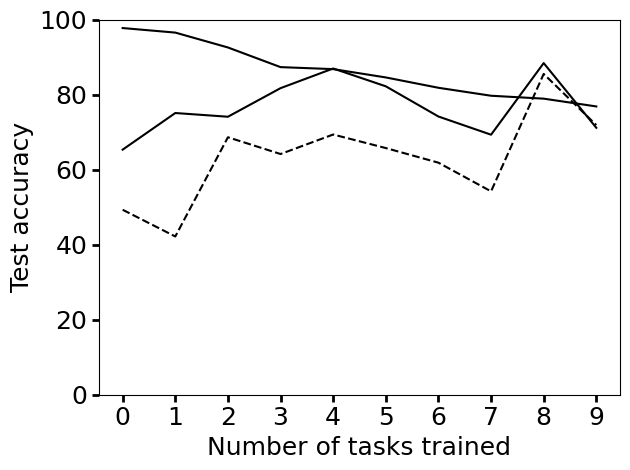

In [48]:
visualize_avg_acc_curve(test_accs_matrix, val_accs_matrix)